In [1]:
!pip install plotly

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

In [9]:
data_with_duplicates = pd.read_csv("apps.csv")
data_with_duplicates.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
data = data_with_duplicates.drop_duplicates() #removing duplicate values
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
print("Total number of apps {}".format(data['App'].count()))

Total number of apps 9659


In [13]:
#cleaning data
remove_char = ('+' , '$' , 'M' , ',' ) 
clean_col = ('Size','Installs','Price')
for i in clean_col:
    data[i] = data[i].astype(str)
    for j in remove_char:
        data[i] = data[i].str.replace(j,'')
    data[i] = data[i].astype(float)

In [26]:
print("Number of categories {}".format(len(set(data['Category'])))) #total number of unique characters
apps_in_category = data['Category'].value_counts().sort_values(ascending=False) # sorting number of apps in each category 
data1 = go.Bar(
    x=apps_in_category.index, #category name
    y=apps_in_category.values, # category count
    name = 'Number of apps in each category',
    )   #plotting 
fig = go.Figure(data1)
fig.show()



Number of categories 33


In [27]:
#Average app rating
print("Average rating of apps: {}".format(data['Rating'].mean()))

Average rating of apps: 4.173243045387994


In [31]:
# Distribution of apps according to their ratings
data2 = [go.Histogram(
    x=data['Rating'],
    xbins={'start':1,'size':0.1,'end':5}
)]

fig = go.Figure(data2)
fig.update_layout(
    title='Distribution of app ratings',
    xaxis_title='Rating',
    yaxis_title='Count/Number of apps',
)
fig.show()

In [33]:
#Size vs Rating Price vs Rating

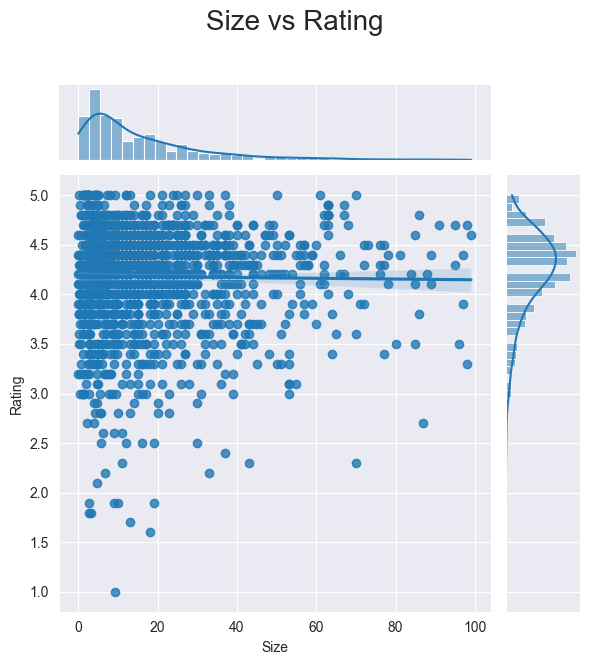

In [62]:
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
large_categories = data.groupby('Category').filter(lambda x: len(x)<= 250).reset_index()
plt1 = sns.jointplot(
    x='Size',
    y='Rating',
    data=large_categories,
    kind='reg',
  
)
plt1.set_axis_labels('Size', 'Rating')
plt1.fig.suptitle('Size vs Rating', fontsize=20, y=1.1)
plt.show()



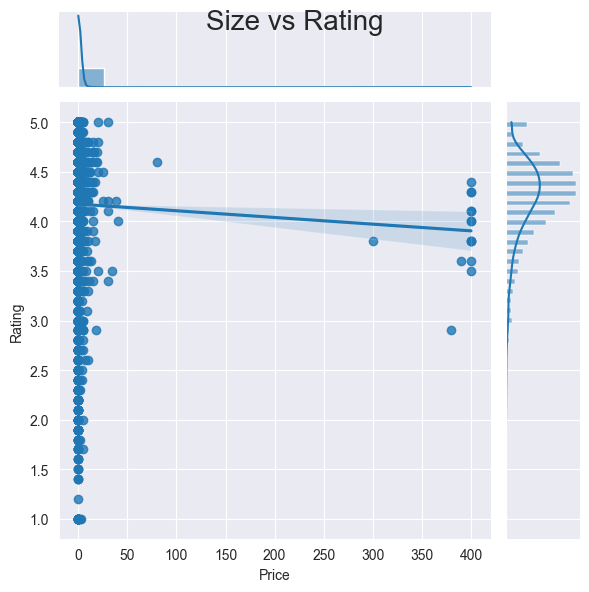

In [61]:
paid_apps = data[data['Type']=='Paid']
plt2 = sns.jointplot(
    x="Price",
    y='Rating',
    
    data=data,
    kind='reg'
   
)
plt2.fig.suptitle("Size vs Rating",fontsize=20)
plt.show()

Text(0.5, 1.0, 'Apps pricing trend across categories')

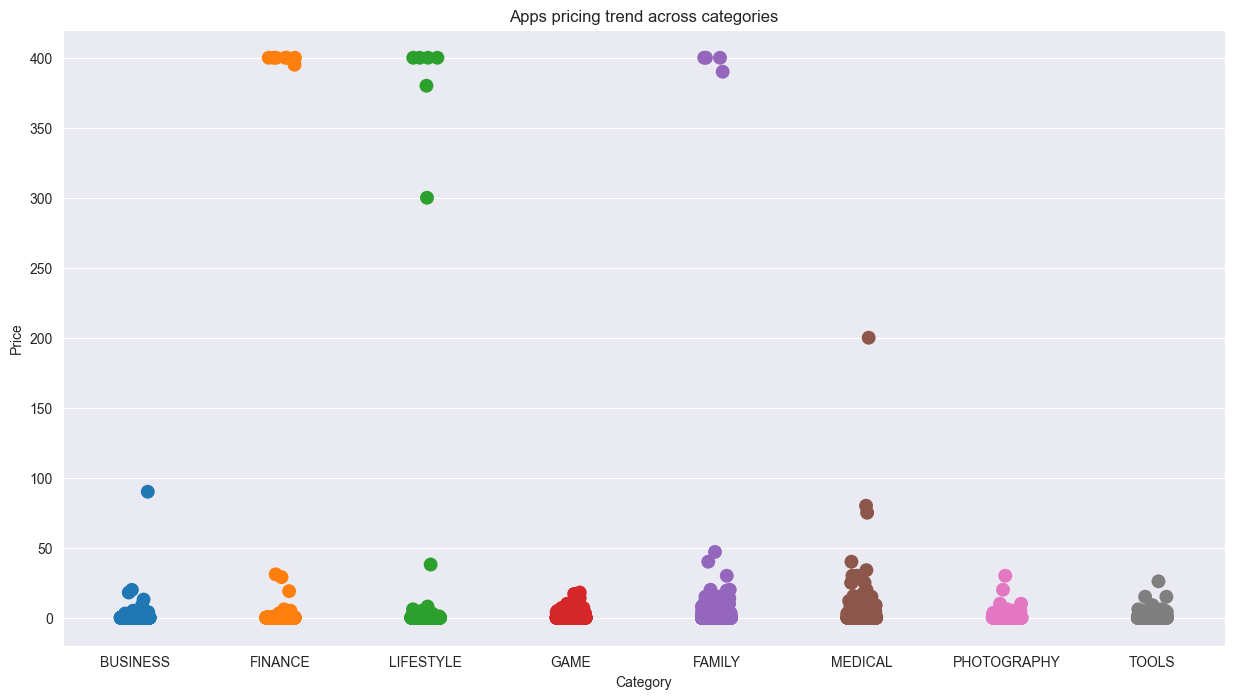

In [69]:
#Relation between app category and app price
fig,ax=plt.subplots(figsize=(15,8))
popular_apps = data[data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]
ax = sns.stripplot(
    x='Category',y='Price',data=popular_apps,
    size=10, hue='Category'
)
ax.set_title("Apps pricing trend across categories")


In [70]:
apps_above_200 = popular_apps[popular_apps['Price']>200]
apps_above_200

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3327,4197,most expensive app (H),FAMILY,4.3,6,1.500,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3465,4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3469,4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4396,5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4398,5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4399,5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
4400,5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4401,5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
4402,5358,I am Rich!,FINANCE,3.8,93,22.000,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4403,5359,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [71]:
apps_below_100 = popular_apps[popular_apps['Price']<100]
apps_below_100

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,10000000.0,Free,0.0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,188,Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000.0,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,189,Uber Driver,BUSINESS,4.4,1254730,NaN,10000000.0,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.0,5000000.0,Free,0.0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,NaN,1000000.0,Free,0.0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,10835,FR Forms,BUSINESS,NaN,0,9.6,10.0,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


Text(0.5, 1.0, 'App pricing trends above 200')

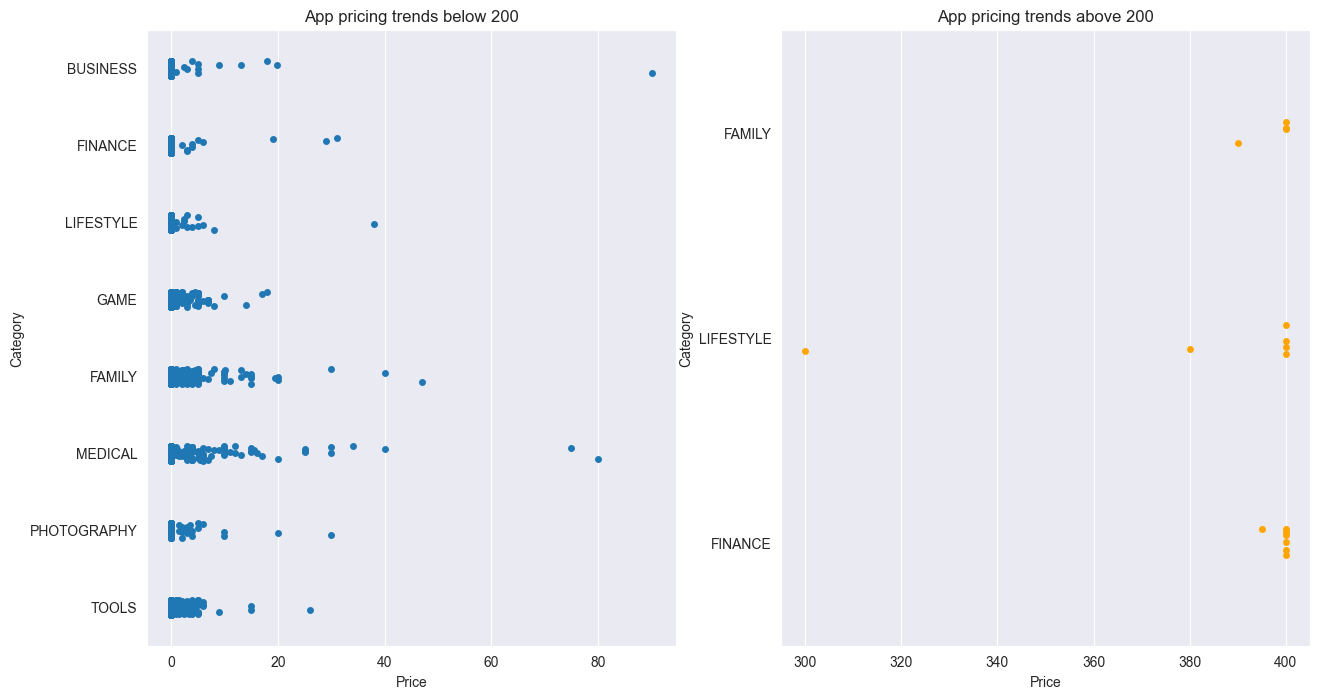

In [79]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.stripplot(
    x='Price',
    y='Category',
    data = apps_below_100,
    ax=ax[0], jitter=True
)
ax[0].set_title("App pricing trends below 200")
sns.stripplot(
    x='Price',
    y='Category',
    data = apps_above_200,
    ax=ax[1],color='orange'
)
ax[1].set_title("App pricing trends above 200")

In [80]:
trace1 = go.Box(
    name="Paid",
    y=data["Installs"][data["Type"] == "Paid"]
)
trace2 = go.Box(
    name="Free",
    y=data["Installs"][data["Type"] == "Free"]
)
layout= go.Layout(
    title="Number of downloads of paid vs free apps",
    yaxis=dict(
        title="Number of downloads",
        type="log",
        autorange=True
    ),
    )
data_list = [trace1,trace2]
fig = go.Figure(data=data_list,layout=layout)
fig.show()



Text(0.5, 1.0, 'Sentiment Polarity Distribution')

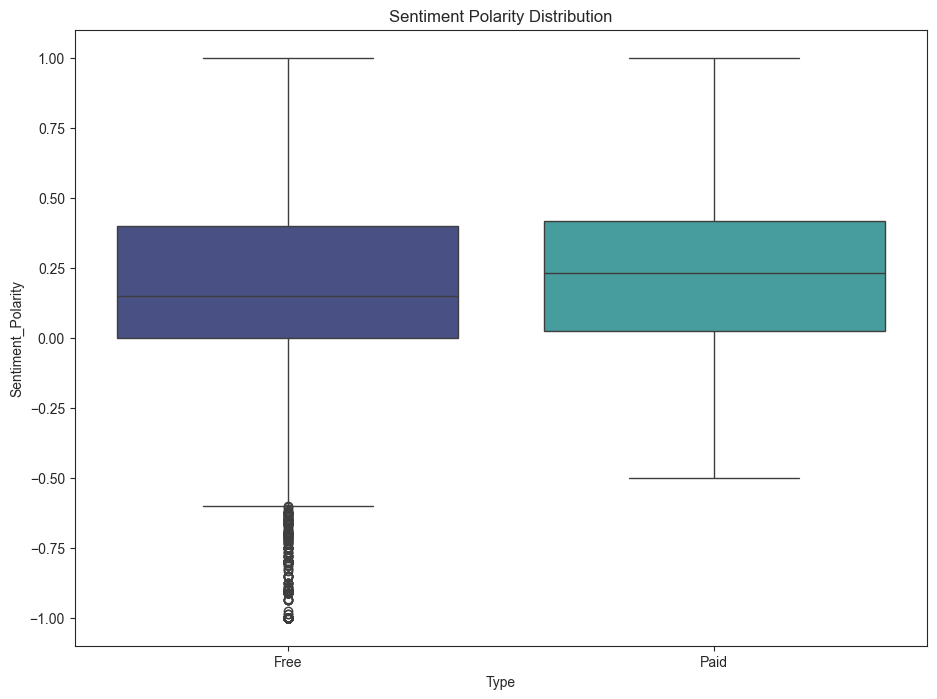

In [12]:
import warnings
warnings.filterwarnings('ignore')
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')
# Join and merge the two dataframe
merged_df = pd.merge(data, reviews_df, on='App', how = "inner")
# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', palette="mako", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')